Application of Bayesian Inference in Model Determination
==============================================

In this Jupyter Notebook...

* Apply Bayesian inference to the determination of a model for noisy data

* Analyze statistical confidence in model based on number of replicates and magnitude of noise

* Compare several candidate models to assess goodness of fit and degree of overfitting of data

Import the necessary modules

In [1]:
import numpy as np
import scipy as sc
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import scipy.special as sp
import random
#import chemeng177.model_define as md

from sklearn import svm
from pathlib import Path

output_folder = Path('figures/')

In [2]:
def f_dist(w, r1, r2):
    r"""
    f_dist - F-Distribution for the distribution of the ratio of variances

    :param w: w parameter in the F-distribution
    :param r1: Degrees of freedom 1 
    :param r2: Degrees of freedom 2
    
    :return: f_val - Value of the F-Distribution
    """

    f_val = sp.gamma((r1 + r2) / 2) * (r1 / r2) ** (r1 / 2) * w ** (r1 / 2 - 1) / (
        sp.gamma(r1 / 2) * sp.gamma(r2 / 2) * (1 + r1 * w / r2) ** ((r1 + r2) / 2))


    return f_val

Generate data from an underlying model

[77.13506387 15.59485137 20.91784401 26.28368021 31.70250838 36.99100333
 42.44543724]


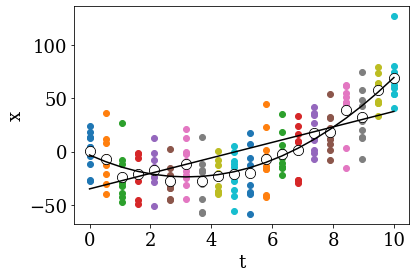

In [3]:
ne = 20
ni = 10
n = ne * ni

t = np.linspace(0, 10, ne)

a0 = 0
a1 = -13
a2 = 2
sigma_x = 20

x = np.random.randn(n) * sigma_x
m = np.zeros(ne)
sse = 0

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_t in range(len(t)):
    ind_0 = i_t * ni
    ind_f = i_t * ni + ni
    x[ind_0:ind_f] += a0 + a1 * t[i_t] + a2 * t[i_t] ** 2
    m[i_t] = np.mean(x[ind_0:ind_f])
    sse += np.sum((x[ind_0:ind_f] - m[i_t]) ** 2)
    
    plt.scatter(t[i_t] + np.zeros(ni), x[ind_0:ind_f])
    
plt.scatter(t, m, s = 100, color = 'k')
plt.scatter(t, m, s = 70, color = 'w')

order_vec = np.array([1, 2, 3, 4, 5, 6, 7])
bic = np.zeros(len(order_vec))

for i_order in range(len(order_vec)):
    order = order_vec[i_order]
    poly = np.polyfit(t, m, order)
    mfit = np.polyval(poly, t)
    if order < 3:
        plt.plot(t, mfit, 'k-')
    ssf = ni * np.sum((m - mfit) ** 2)
    r1 = ne - (order + 1)
    r2 = n - ne
    w = (ssf / r1) / (sse / r2)
    f_order = f_dist(w, r1, r2)
    bic[i_order] = -2 * np.log(f_order) + (order + 1) * np.log(n)

print(bic)

plt.xlabel('t')
plt.ylabel('x')

#plt.savefig('figures/model_define/model_compare.pdf', bbox_inches='tight')    
plt.show()

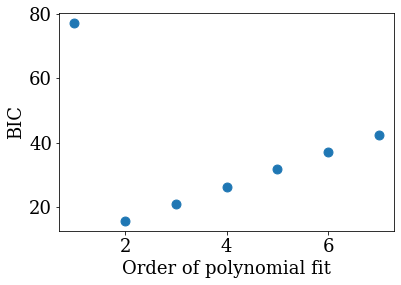

In [4]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(order_vec, bic, s = 80)

plt.xlabel('Order of polynomial fit')
plt.ylabel('BIC')

#plt.savefig('figures/model_define/bic.pdf', bbox_inches='tight')    
plt.show()

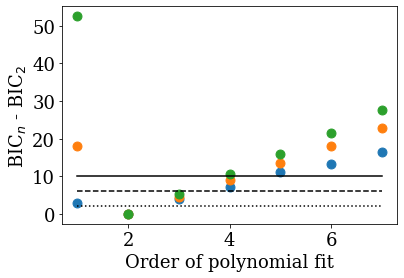

In [5]:
ne = 20
ni_vec = np.array([2, 5, 10])

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_ni in range(len(ni_vec)):
    ni = ni_vec[i_ni]
    n = ne * ni

    t = np.linspace(0, 10, ne)

    a0 = 0
    a1 = -13
    a2 = 2
    sigma_x = 20

    x = np.random.randn(n) * sigma_x
    m = np.zeros(ne)
    sse = 0
                                      
    for i_t in range(len(t)):
        ind_0 = i_t * ni
        ind_f = i_t * ni + ni
        x[ind_0:ind_f] += a0 + a1 * t[i_t] + a2 * t[i_t] ** 2
        m[i_t] = np.mean(x[ind_0:ind_f])
        sse += np.sum((x[ind_0:ind_f] - m[i_t]) ** 2)

    order_vec = np.array([1, 2, 3, 4, 5, 6, 7])
    bic = np.zeros(len(order_vec))

    for i_order in range(len(order_vec)):
        order = order_vec[i_order]
        poly = np.polyfit(t, m, order)
        mfit = np.polyval(poly, t)
        ssf = ni * np.sum((m - mfit) ** 2)
        r1 = ne - (order + 1)
        r2 = n - ne
        w = (ssf / r1) / (sse / r2)
        f_order = f_dist(w, r1, r2)
        bic[i_order] = -2 * np.log(f_order) + (order + 1) * np.log(n)

    col_val = 'C' + str(int(i_ni))
    plt.scatter(order_vec, bic - bic[1], s = 80, color = col_val)

plt.plot(np.array([1, 7]), np.array([2, 2]), 'k:')
plt.plot(np.array([1, 7]), np.array([6, 6]), 'k--')
plt.plot(np.array([1, 7]), np.array([10, 10]), 'k-')

plt.xlabel('Order of polynomial fit')
plt.ylabel('BIC$_{n}$ - BIC$_{2}$')

#plt.savefig('figures/model_define/bic.pdf', bbox_inches='tight')    
plt.show()